In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_agro = pd.read_csv(r'..\\Bases de datos\\EvaluacionAgro01.csv',sep=';')
df_agro.head()

,Dpto,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,nombreCientificoCultivo,estadoFisicoCultivo
0,Boyacá,Tunja,Fresa,Fresa,Permanente,Frutales,Demas frutales,2019,C,3.0,3.0,30.0,10.0,Fragaria vesca,En fresco
1,Boyacá,Tunja,Avena,Avena,Transitorio,Cereales,Cereales,2019,A,160.0,160.0,480.0,3.0,Avena sativa,En fresco
2,Boyacá,Tunja,Cebada,Cebada,Transitorio,Cereales,Cereales,2019,A,20.0,20.0,60.0,3.0,Hordeum vulgare,En fresco
3,Boyacá,Tunja,Maíz Tradicional,Maíz,Transitorio,Cereales,Cereales,2019,A,180.0,180.0,360.0,2.0,Zea mays,En fresco
4,Boyacá,Tunja,Cebolla De Bulbo,Cebolla De Bulbo,Transitorio,Hortalizas,Hortalizas de raíz,2019,A,120.0,120.0,2400.0,20.0,Allium cepa,En fresco


In [2]:
df_agro['grupoCultivo'] = df_agro['grupoCultivo'].str.replace('Cultivos para Condimentos y Bebidas Medicinales y Aromáticas','Condimentos Bebidas y Aromáticas')
df_agro.shape

(18337, 15)

### Creación de variable PerdidaTon
Va representar la predida segun el area sembrada y el rendimeinto por hectaria en toneladas

$$ (Area_{sembrada}-Area_{cosehada})\times RendimientoTonHa = PerdidaTon$$

In [3]:
df_agro = df_agro[df_agro['areaSembradaHa'] >= df_agro['areaCosechadaHa']]

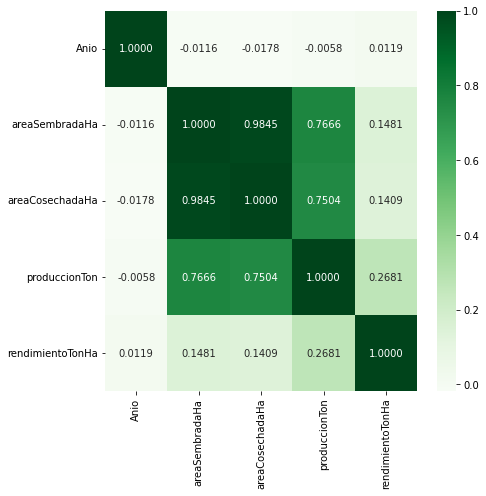

In [4]:
todo = df_agro[['Anio','areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']] # selecion de los datos para realizar una comparación son simple
tabla_agro = todo.corr()
plt.figure(figsize=(7,7))
sns.heatmap(tabla_agro,annot=True,cmap='Greens',fmt='.4f')
plt.show()

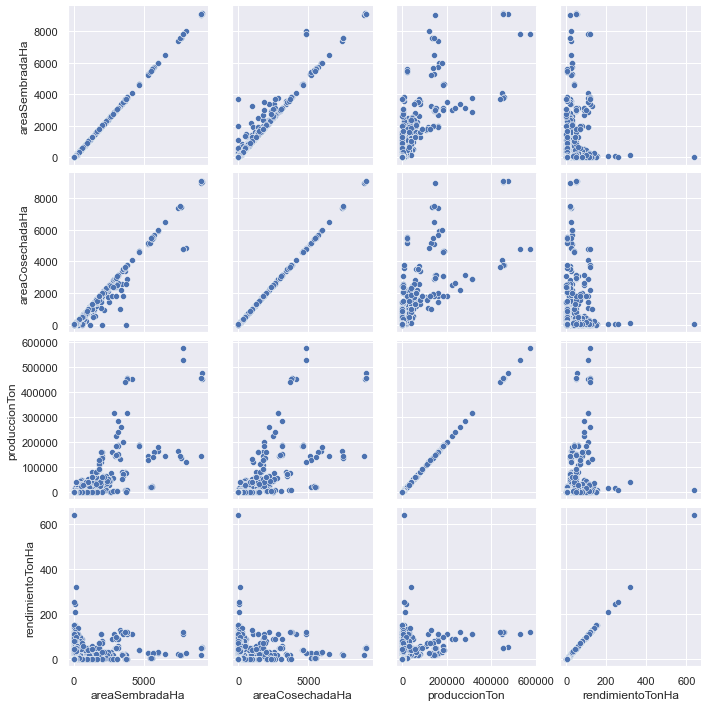

In [5]:
sns.set(rc={'figure.figsize':(7,7)})
sns.pairplot(data=todo[['areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']],diag_kind=None)
# plt.title('Grafico de dispersión entre las variables numéricas',fontsize=13)
plt.show()

In [6]:
df_agro['PerdidaTon'] = (df_agro['areaSembradaHa']-df_agro['areaCosechadaHa'])*df_agro['rendimientoTonHa']

In [7]:
df_agro['PerdidaPorcentaje'] = (df_agro['PerdidaTon']/df_agro['produccionTon'])*100

In [8]:
tabla =  df_agro.groupby(['Dpto','grupoCultivo','Anio','Periodo']).sum()
tabla.sort_values(['Dpto','areaSembradaHa'],ascending=False,inplace=True)
tablaLimpia = tabla.reset_index()
tablaLimpia

,Dpto,grupoCultivo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,PerdidaTon,PerdidaPorcentaje
0,Cundinamarca,Cultivos Tropicales Tradicionales,2019,C,75245.40,68517.80,1964243.97,2666.65,76484.5500,2730.375981
1,Cundinamarca,Cultivos Tropicales Tradicionales,2021,C,74733.82,69178.05,1782647.49,2564.03,41933.9239,1762.623312
2,Cundinamarca,Cultivos Tropicales Tradicionales,2022,C,74572.28,69271.83,1789303.34,3301.57,72586.5227,29702.863630
3,Cundinamarca,Cultivos Tropicales Tradicionales,2020,C,74431.10,69081.10,1950209.12,2573.82,43417.4700,2252.116252
4,Cundinamarca,Frutales,2021,C,55272.72,51351.30,623209.11,6720.68,75711.4205,46662.956162
...,...,...,...,...,...,...,...,...,...,...
112,Boyacá,Oleaginosas,2022,C,18.80,15.80,75.55,20.30,10.0000,410.526316
113,Boyacá,Condimentos Bebidas y Aromáticas,2019,A,3.00,2.50,4.50,4.00,0.5000,33.333333
114,Boyacá,Condimentos Bebidas y Aromáticas,2020,A,2.20,1.70,1.70,2.00,0.5000,33.333333
115,Boyacá,Condimentos Bebidas y Aromáticas,2019,B,2.00,2.00,1.50,1.50,0.0000,0.000000


### Creación de graficas interectivas
Graficas interactivas de [areaSembradaHa	areaCosechadaHa	produccionTon	rendimientoTonHa	Perdida], en relación al departamento, año y periodo del cultivo

In [9]:
import ipywidgets as widgets

Creación de la función de grafica

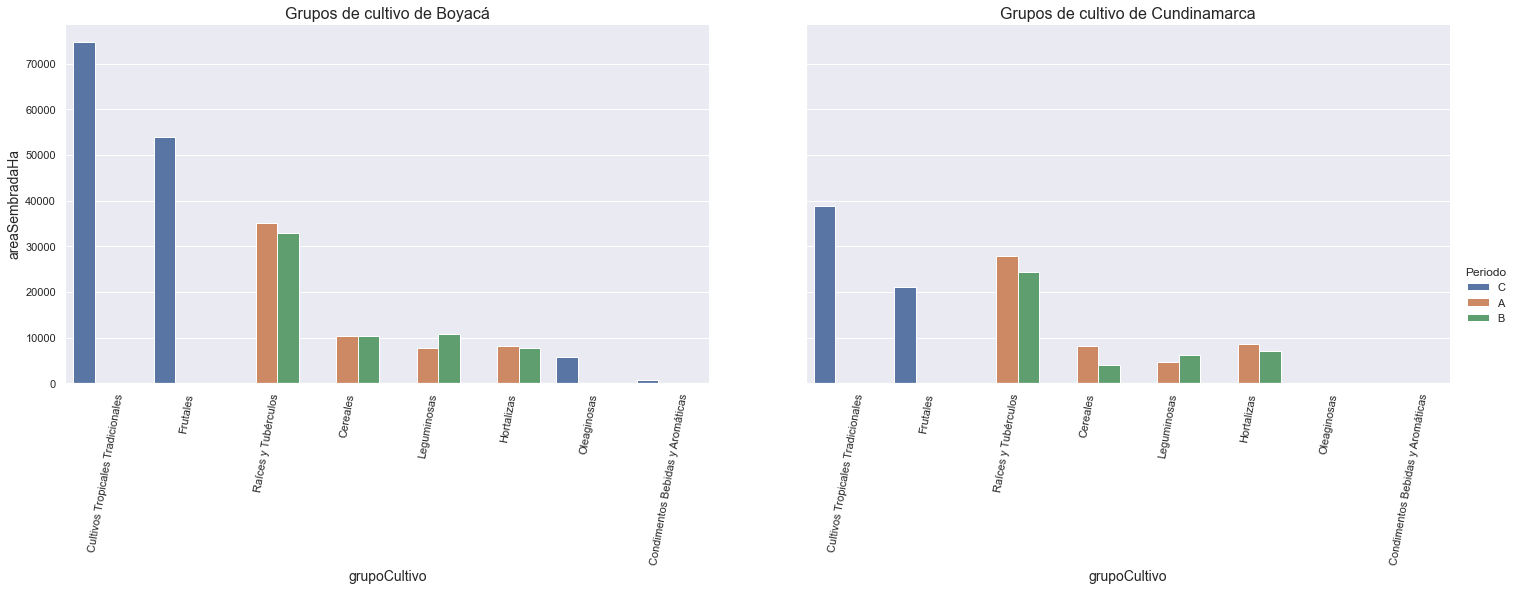

In [10]:
def grafica(categoria):
    sns.set_style("darkgrid")
    g = sns.catplot(data=tablaLimpia,
            x='grupoCultivo',
            y = categoria,
            hue='Periodo',
            kind='bar',
            col='Dpto',
            aspect=1.7,
            errorbar=None,
            height=6)
    lista = g.axes.flatten()
    g.set_xlabels(fontsize=14)
    g.set_ylabels(fontsize=14)
    lista[0].set_title('Grupos de cultivo de Boyacá',fontsize=16)
    lista[1].set_title('Grupos de cultivo de Cundinamarca',fontsize=16)
    for ax in g.axes.flatten():
        ax.tick_params(axis='x', rotation=80)
    plt.show()
    
grafica('areaSembradaHa')

Creación de la función categoria

In [12]:
categoria_Dropdown= widgets.Dropdown(
    value = 'areaSembradaHa',
    description = 'Categoria',
    options = ['areaSembradaHa','areaCosechadaHa','produccionTon'
               ,'PerdidaTon','rendimientoTonHa']
)
widgets.interact(grafica ,categoria = categoria_Dropdown)

interactive(children=(Dropdown(description='Categoria', options=('areaSembradaHa', 'areaCosechadaHa', 'producc…

<function __main__.grafica(categoria)>